# Teste A/B

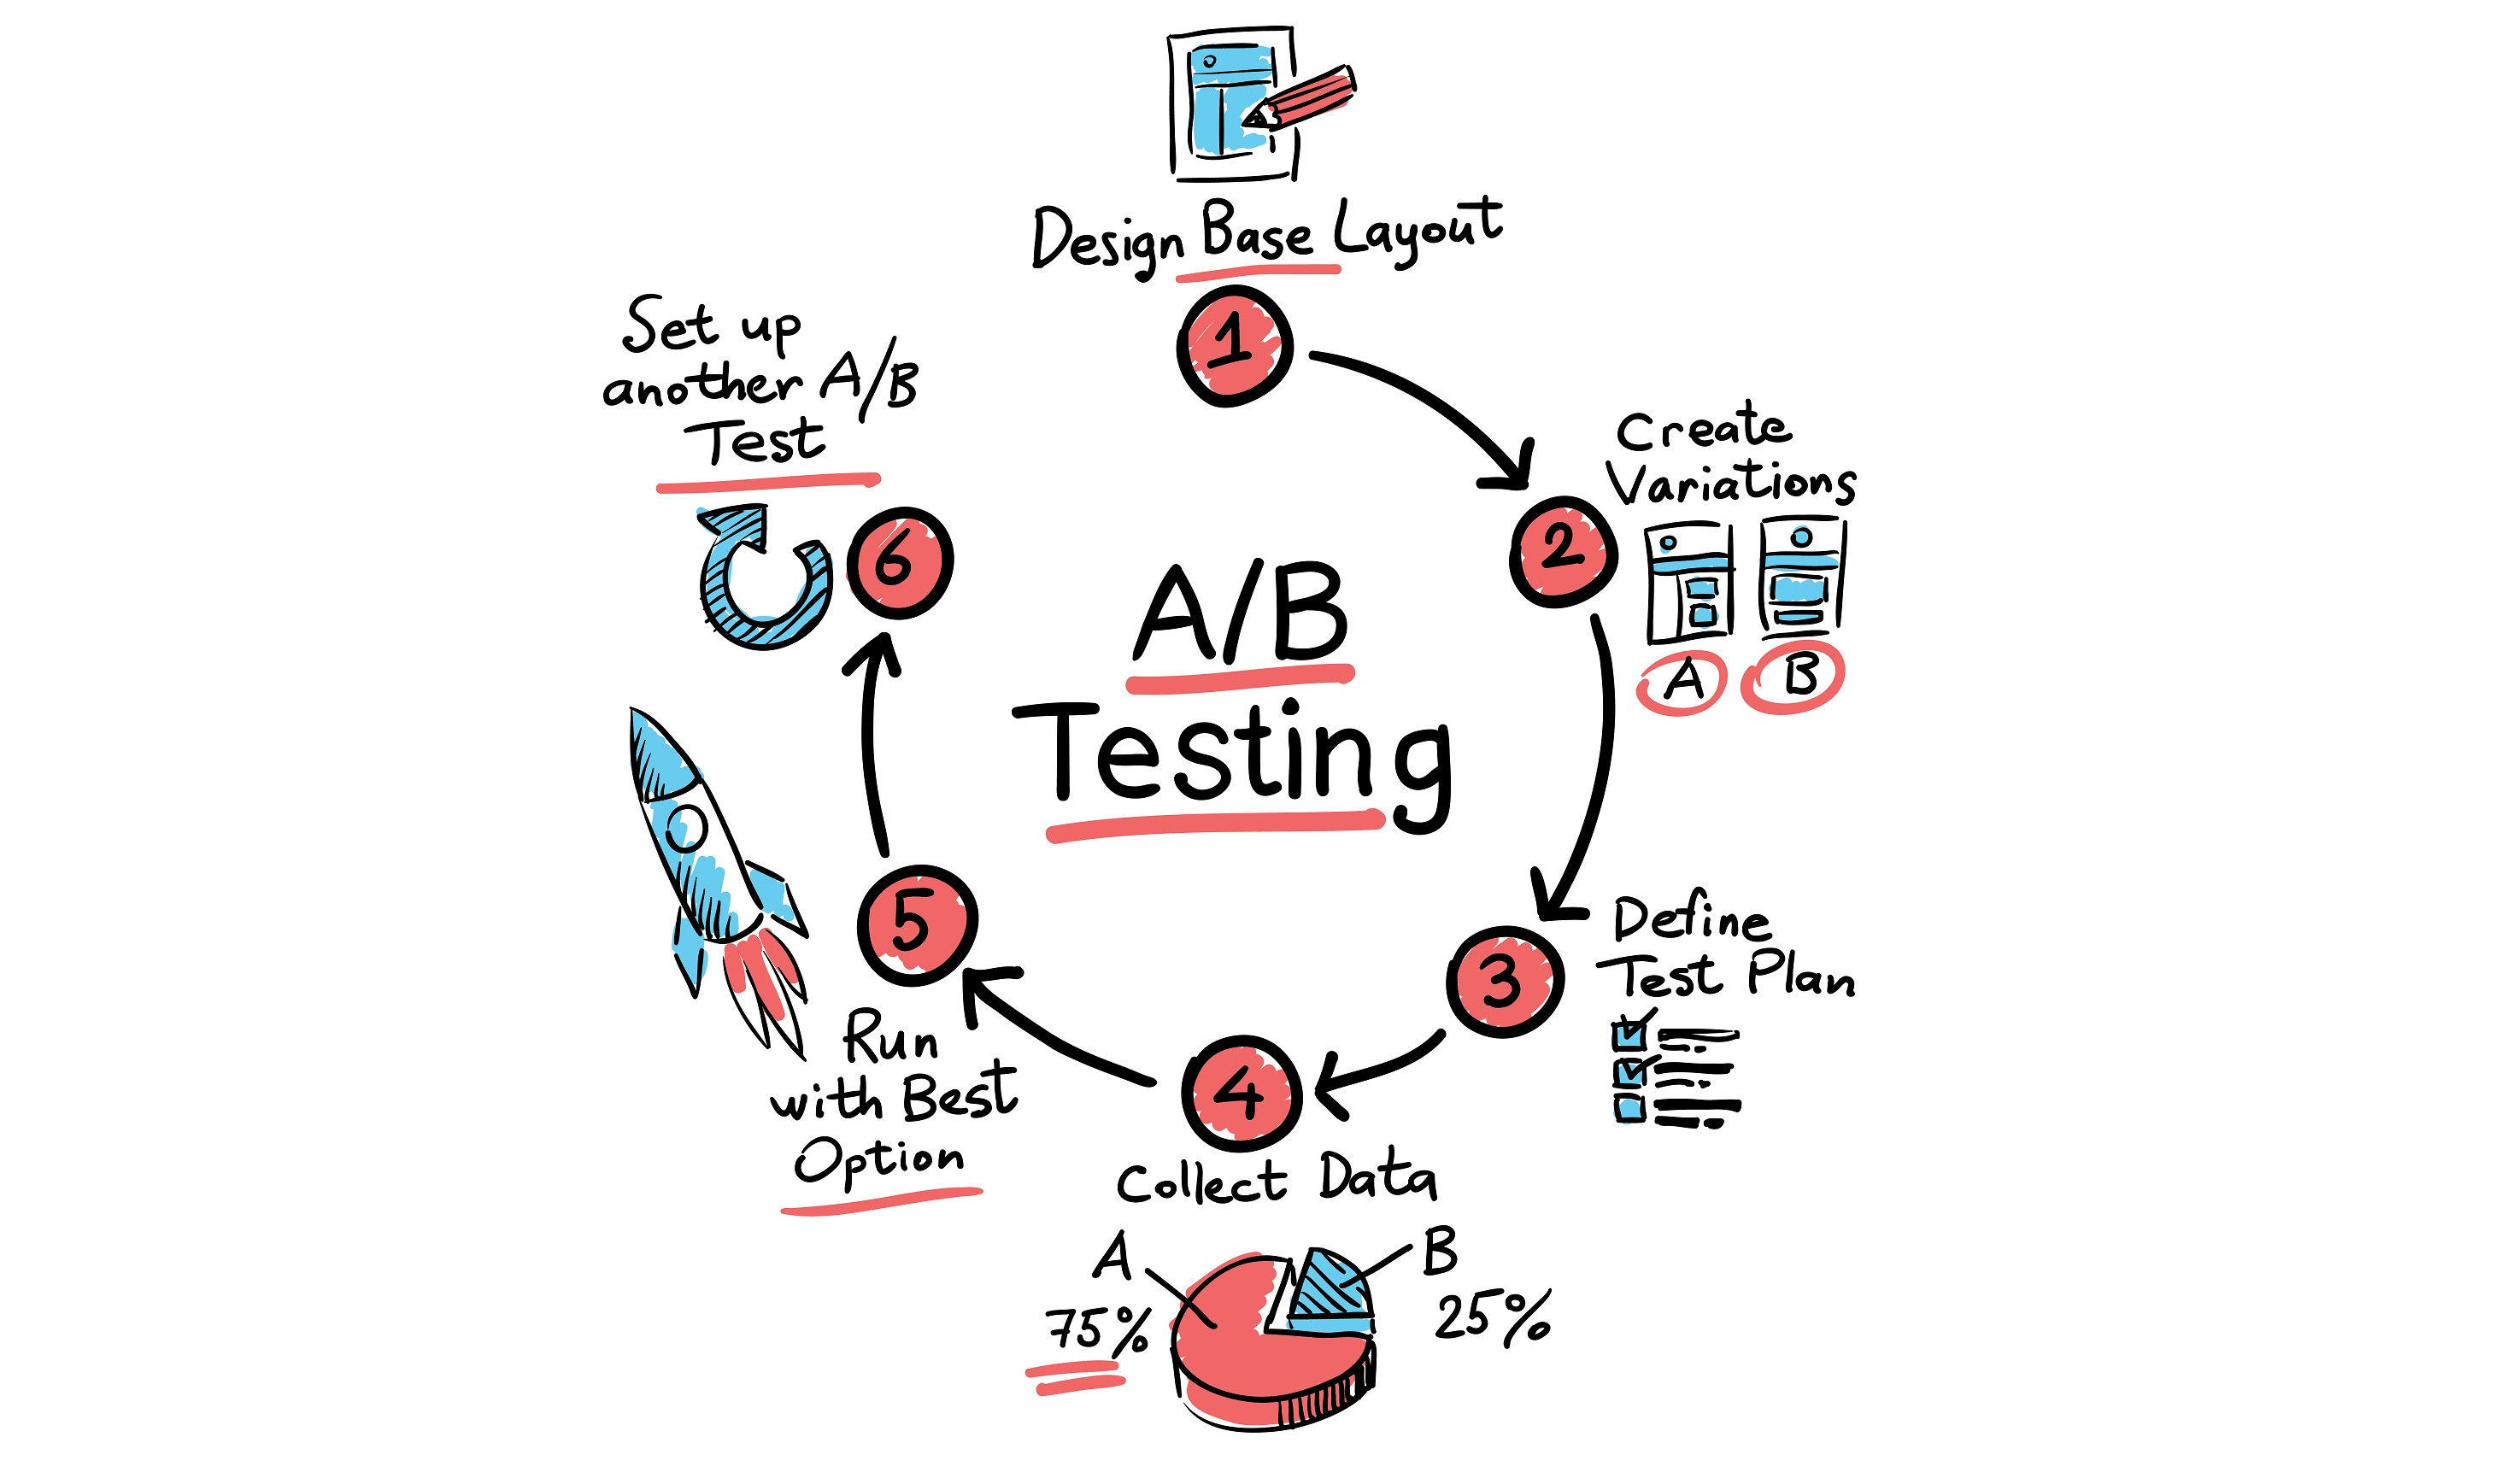

In [1]:
from IPython.display import Image
Image(filename='ab-testing.jpg')

# Introdução

Este projeto consiste no teste de uma possível alteração na forma como os usuários se inscrevem no teste de 15 dias para qualquer curso no site da Udacity. Os dados que serão usados não são os reais, mas uma adaptação com os mesmos resultados e a técnica para mensurar a mudança será o teste A/B. 

Para isso, teremos dados de vários usuários diferenciados em dois grupos. O grupo de controle será de pessoas com a interface antiga e o grupo de experimento será de pessoas com as novas mudanças aplicadas. Desta forma, com os resultados obtidos será possível tomar uma decisão se essas novas alterações realmente ajudam ou não os usuários dos cursos Udacity. 

Os dados são compostos pelas visualizações de páginas recebidas, números de cliques no botão "Iniciar teste gratuito", números de pessoas que finalizam a inscrição e, finalmente, números de usuários que começam a pagar pelo curso.

# Design Experimental

A hipótese seria estabelecer expectativas mais claras para os alunos antecipadamente, reduzindo assim o número de alunos frustrados que abandonavam o período grátis por não ter tempo suficiente para se dedicar ao curso, sem que significativamente reduzisse o número de estudantes que passavam pelo período grátis e completavam o curso. 

Se essa hipótese fosse verdadeira, a Udacity poderia melhorar a experiência geral dos alunos e a capacidade dos instrutores para que pudessem auxiliar aqueles que completarão o curso. A unidade de desvio é o cookie da página, entretanto se o aluno se inscrever na versão gratuita do curso eles são rastreados pelo id de usuário daquele ponto em diante, sendo assim, o mesmo id não poderia se inscrever no teste gratuito duas vezes. Para usuários que não se inscrevem, seu id de usuário não é monitorado no experimento, mesmo que eles tenham se inscrito quando visitaram a página de visão geral do curso.

# Métricas no geral

**Number of cookies:** número de cookies únicos para visualizar a página de visão geral do curso. (dmin = 3000)

**Number of user-ids:** número de usuários que se inscrevem na versão de avaliação gratuita. (dmin = 50)

**Number of clicks:** número de cookies exclusivos para clicar no botão _"start free trial"_. (dmin = 240)

**Click-through-probability:** número de cookies exclusivos para clicar no botão _"start free trial"_ dividido pelo número de cookies únicos para ver a página de visão geral do curso. (dmin = 0,01)

**Gross conversion:** número de ID de usuário para concluir a compra e inscrever-se no teste gratuito dividido por número de cookies únicos ao clicar no botão _"start free trial"_. (dmin = 0,01)

**Retention:** números de IDs de usuários que permaneceram passados os 14 dias dividido pelo _"number of user-ids"_ que completaram o check-out. (dmin = 0,01)

**Net Conversion:** números de IDs de usuários que permaneceram após o limite de 14 dias, dividido pelo número de cookies únicos que clicaram no botão _"start free trial"_ . (dmin = 0,0075)

# Métricas escolhidas

## Métricas Invariantes

Métricas invariantes são aquelas que deverão permanecer inalteradas nos grupos Controle e Experimento.

**Number of cookies:** é uma métrica de dimensionamento de população e não é afetada pelo experimento, fornecendo a possibilidade de fazer a verificação de sanidade. Além do mais, é uma boa métrica invariante porque ela é diretamente randomizada entre os grupos de experimento e controle.

**Number of clicks:** selecionado como invariante porque os dados foram recebidos antes do experimento ocorrer e permanecem inalterados.

**click-through-probability:** dado de probabilidade que não é afetado pela mudança, cujo qual se torna um bom indicador de invariância.

## Métricas de Avaliação

Métricas de avaliação são aquelas esperadas para serem diferentes nos grupos Controle e Experimento.

**Gross conversion:** oferece uma boa proporção dos usuários que se inscreveram com o número de cliques, é afetado pelo experimento.

**Retention:** é dependente do teste, já para métrica Invariante não é uma boa opção visto que o número de alunos inscritos e pagos são afetados pelos resultados do teste.

**Net conversion:** boa métrica de avaliação porque ela muda de acordo com os resultados dos testes e nos fornece uma boa visão sobre o engajamento dos usuários pelo curso, monitorando aqueles que continuam após os 14 dias, pelo número de cliques.

# Métrica descartada

**Number of user-ids:** devido suas características, esta não é uma boa métrica Invariante e nem de Avaliação, uma vez que o número de usuários que se inscrevem no teste gratuito depende dos resultados dele e pode ser diferente em grupos de controle e de experimento. É uma métrica ruim pois ela é apenas monitorada depois que o aluno se matricula no período de teste.

# Resultados Esperados (hipóteses)

Espera-se como resultado do experimento que o número de alunos inscritos no _start free trial_ diminua. Espera-se que a métrica de avaliação **Gross conversion** se reduza para uma margem estatisticamente significativa, isto é, indicando redução dos custos para a empresa e, ao mesmo tempo, espera-se que a métrica **Net Conversion** não reduza estatisticamente de forma significativa, evidenciando que o experimento não reduzirá a receita da empresa.

## Variabilidade Empírica de uma métrica - entendendo o conceito

Segundo as especialistas do módulo referente a este projeto, uma variabilidade calculada empiricamente pode ser muito maior que uma variabilidade calculada analiticamente, isto acontece quando a unidade de análise é diferente da unidade de desvio e a unidade de análise é, basicamente, o denominador da métrica. 

Por exemplo, se fizermos as taxas de cliques e estas estiverem divididas por visualização de páginas, então, esta visualização será a sua análise. Mas, quando sua unidade de desvio também é uma visualização de página, como em um desvio baseado em evento, a variabilidade calculada analiticamente tem chances de ser muito próxima da variabilidade calculada de forma empírica.

Porém, se a unidade de desvio for um cookie ou um ID de usuário, a variabilidade da mesma taxa de cliques será bem maior, por um fator de 4 ou 5 vezes, ou talvez mais. Nesses casos, é necessário mudar para uma variabilidade calculada empiricamente, devido à sua unidade de desvio. Isso faz diferença porque, basicamente, quando é feito o cálculo de variabilidade de forma analítica, é levantada uma hipótese sobre a distribuição dos dados. 

E ao levantar uma hipótese sobre a distribuição dos dados, é necessário realizar uma representação e verificar se eles são independentes ou não. Ao fazer um desvio baseado em evento, cada evento é uma representação aleatória diferente, então sua suposição sobre independência é válida. Porém, ao fazer um desvio baseado em ID de usuário ou até mesmo em cookies, a suposição sobre independência não é mais válida, isto porque, na verdade estamos separando grupos de eventos que se correlacionam, e isso acaba aumentaando muito sua variabilidade.

# Desvio Padrão estimado (SE) - Métricas de Avaliação

Dados obtidos da planilha _Baseline Values_ fornecida pela Udacity para os cálculos do projeto em questão.

| Label | Baseline Values | 
| :-----: | :-----: | 
| Unique cookies to view page per day | 40000 | 
| Unique cookies to click "Start free trial" per day | 3200 |
| Enrollments per day | 660 |
| Click-through-probability on "Start free trial" | 0.08 |
| Probability of enrolling, given click | 0.20625 |
| Probability of payment, given enroll | 0.53 |
| Probability of payment, given click | 0.1093125 |

Assumindo que as métricas de Avaliação possuem distribuição binomial, o desvio padrão estimado (SE) pode ser calculado pela fórmula SE=√p∗(1−p)/N, sendo assim vejamos:

Dado um tamanho de amostra de 5000 cookies únicos visitando a página geral do curso, podemos fazer uma estimativa analítica do desvio padrão de cada métrica de avaliação. Para isso utilizamos os dados da tabela acima; número de cookies únicos que clicam no botão _"Start Free Trial"_ por dia (3200) e cookies únicos que veem a página por dia (40000). O denominador para as métricas _Gross_ e _Net conversion_ nos grupos de Controle e Experimento são os mesmos, como podemos ver nos resultados abaixo (N = 400), já o denominador para a métrica _Retention_ é outro (N = 82.5).

In [1]:
# Cálculos do desvio padrão
import math
print "Primeiro obtemos"
print "Denominador para o desvio padrão de Gross e Net conversion =", 5000 * 3200 / 40000 
print "Denominador para o desvio padrão da métrica Retention =", 5000 * 0.08 * 0.20625 
print "Em seguida obtemos"
print "SE Gross conversion =", math.sqrt(0.20625 * (1 - 0.20625) / 400)
print "SE Net conversion =", math.sqrt(0.1093125 * (1 - 0.1093125) / 400)
print "SE Retention =", math.sqrt(0.53 * (1 - 0.53) / 82.5)

Primeiro obtemos
Denominador para o desvio padrão de Gross e Net conversion = 400
Denominador para o desvio padrão da métrica Retention = 82.5
Em seguida obtemos
SE Gross conversion = 0.020230604137
SE Net conversion = 0.0156015445825
SE Retention = 0.0549490121785


A tabela nos mostra os dados e cálculos obtidos de **Gross, Net conversion** e **Retention**:


|  | Gross conversion | Net conversion | Retention |
| :-----: | :-----: | :-----: | :-----: |
| denominador (N) | 400 | 400 | 82.5 |
| probabilidade de ocorrência (p) | 0.20625 | 0.1093125 | 0.53 |
| desvio padrão (SE) | 0.0202 | 0.0156 | 0.0549 |

# Dimensionamento

## Amostras vs. Power

Primeiramente, a correlação de Bonferroni não foi utilizada nesta análise. dado que as métricas de avaliação são provavelmente covariantes. A correção de Bonferroni é um procedimento que funciona bem em
múltiplas comparações. Em algumas situações, o teste de Bonferroni se mostra bastante "conservativo" (fraco), isto é, a taxa de erro da família de testes (FWER) é muito menor do que o nível de significância (alpha) estabelecido (Portal Action). Essas características poderiam ter levado a problemas futuros no projeto.

Para determinar o tamanho da amostra utilizei o website _Evan’s Awesome A/B Tools_, de Evan Miller, e sua ferramenta chamada _Sample Size Calculator_. Miller desenvolveu um conjunto de ferramentas que ajudam no processo de planejamento no início de qualquer teste A/B.

A calculadora de tamanho de amostra foi projetada para informar quantos visitantes precisamos para cada versão do teste, o que permite prever quanto tempo o teste demorará para ser executado. 

Vejamos nas imagens a seguir.

Para **Gross conversion** o tamanho da amostra é de 25,835 por variação.

Para **Net conversion** o tamanho da amostra é de 27,413 por variação.

Para **Retention** o tamanho da amostra é de 39,115 por variação.

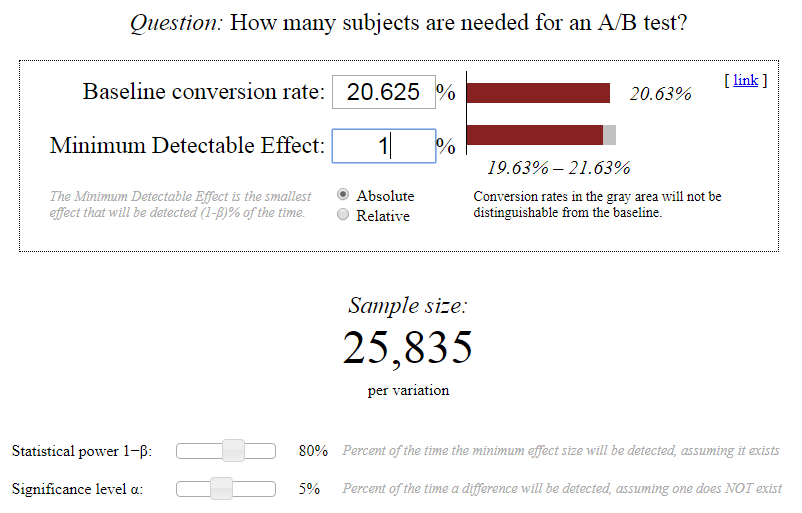

In [2]:
Image(filename='gross conversion.png')

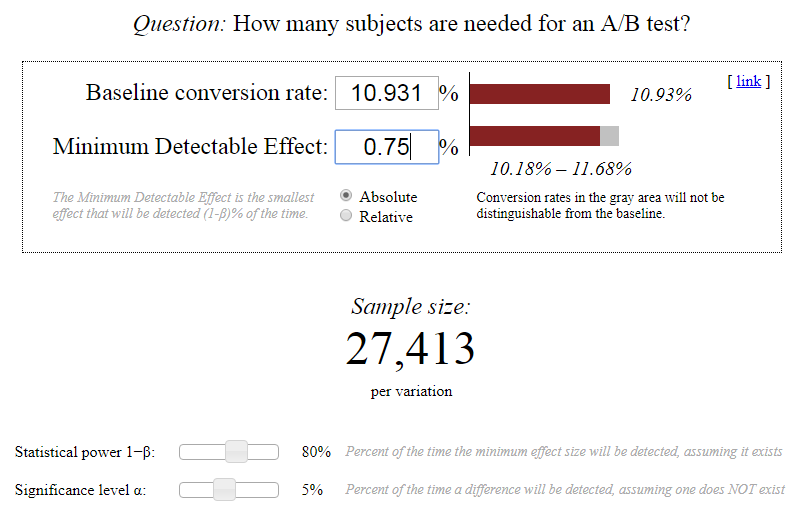

In [3]:
Image(filename='net conversion.png')

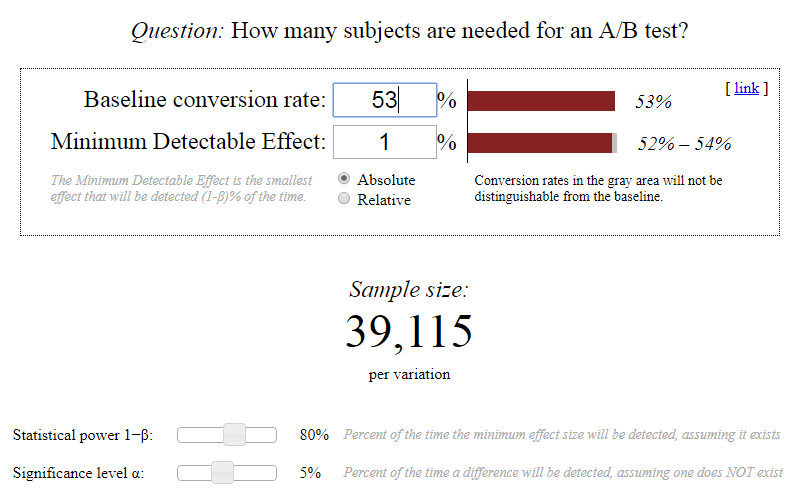

In [4]:
Image(filename='retention.png')

Para a métrica _Retention_, que possui o maior _sample size_, reproduzi uma visualização que é baseada em um teste Z da amostra em questão. Através da visualização interativa criada em D3 por Kristoffer Magnusson, acessado pelo link http://rpsychologist.com/d3/NHST/, é possível verificar as distribuições de amostragem.

Normalmente especificamos o efeito mínimo que estamos interessados em encontrar (digamos Cohen's d = 0,1), definimos α para 0,05 e β para 0,2 (ou seja, 80% de power). Segundo definição do próprio site, a análise _power_ nos indicará quão grande a nossa amostra precisa ser para alcançar esse poder. Dado o tamanho de amostra necessária, se refazermos nosso estudo muitas vezes com novas amostras aleatórias em 80% do tempo rejeitaremos corretamente a hipótese nula, ou seja, veremos que p < α.

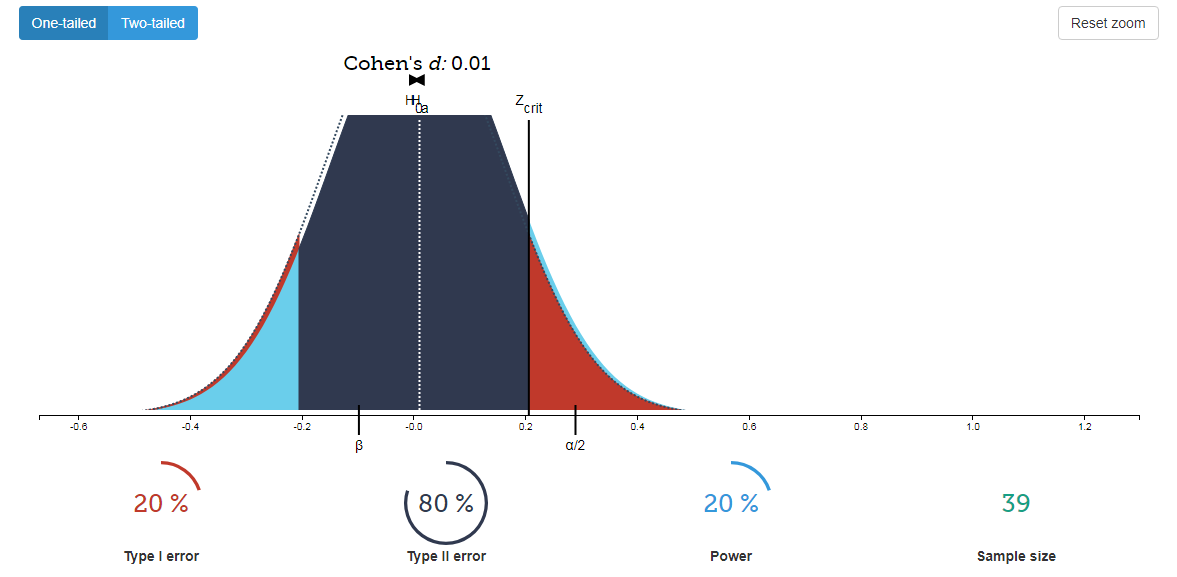

In [2]:
Image(filename='Power and Significance.png')

In [8]:
# Cálculo dos grupos de controle e experimento para determinar as pageviews
print "Gross conversion: 2 × 25835 × 40000 ÷ 3200 = ", 2 * 25835 * 40000 / 3200
print "Net conversion:  2 × 27413 × 40000 ÷ 3200 = ", 2 * 27413 * 40000 / 3200
print "Retention:  2 × 39115 × 40000 ÷ 660 = ", 2 * 39115 * 40000 / 660

Gross conversion: 2 × 25835 × 40000 ÷ 3200 =  645875
Net conversion:  2 × 27413 × 40000 ÷ 3200 =  685325
Retention:  2 × 39115 × 40000 ÷ 660 =  4741212


Acima calculamos a quantidade de visualizações (pageviews) para a métrica de avalização e temos a seguinte tabela com os dados trabalhados até aqui, de forma clara:

| Métrica | Baseline conversion | Minimum Detectable Effect | Alpha | 1 - Beta | Sample size | Clicks/Page view | Pageviews |
| :-----: | :-----: | :-----: | :-----: | :-----: | :-----: | :-----: | :-----: |
| Gross conversion | 20.625% | 1% | 5% | 80% | 25.835 | .08 | 645875 |
| Net conversion | 10.931% | 0.75% | 5% | 80% | 27.413 | .08 | 685325 |
| Retention | 53% | 1% | 5% | 80% | 39.155 | .0165 | 4741212 | 

## Duração vs. Exposição

A estimativa de quantidade de visualizações foi feita em função da métrica _Retention_, já que essa foi a métrica que exigiu o maior número de visualizações. Considerando um total de 40000 cookies únicos por dia no website, iremos necessitar ao todo de 4741212/40000 = 118 dias.

Verificando melhor parcebi que 118 dias é um período muito longo para um experimento e acredito que seja inviável financeiramente para um negócio. Vou reconsiderar a decisão anterior e passar a utilizar a métrica _Net conversion_ e refazer os cáculos.

Para _Net conversion_ - duração do experimento = 685325/40000 = 17,133 dias. Verifiquei também que alguns consideraram 20 dias como um bom tempo para realizar o experimento, sendo assim, tem que se calcular o _Net conversion pageviews_ da seguinte forma, 685.325/20 = 34.267 pageviews. Representando 34267/40000 = 85,7% de tráfego.

O valor de 85.7% de tráfego representa um trade-off entre um tempo considerado aceitável para a realização do experimento, que é de 20 dias. O experimento não irá afetar todo o tráfego do site, não envolvendo os atuais estudantes que já possuem pagamentos em andamento. Além do mais, o conteúdo do site não irá sofrer modificação, portanto, não acredito que seja um experimento de alto risco.

In [15]:
# Cálculos de duração vs exposição
print "Primeiro obtemos"
print "Número de pageviews para a métrica Retention =", 4741212 / 40000, "dias (inviável)."
print "Em seguida"
print "Número de pageviews para a métrica Net conversion =", 685325 / 40000, "dias."
print "Net conversion pageviews para 20 dias=", 685.325 / 20, "pageviews"
print "Pageviews representa =", 34.267 / 40.000, "= 85,7% de tráfego"

Primeiro obtemos
Número de pageviews para a métrica Retention = 118 dias (inviável).
Em seguida
Número de pageviews para a métrica Net conversion = 17 dias.
Net conversion pageviews para 20 dias= 34.26625 pageviews
Pageviews representa = 0.856675 = 85,7% de tráfego


# Análises

Irei fazer algumas pequenas análises estatísticas introdutórias logo abaixo, além daquelas obrigatórias no escopo. E para facilitar o processo e manuseio dos dados dividi a planilha em duas, uma para o grupo de Controle e a outra para o grupo de Experimento.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Uma planilha de Controle e outra de Experimento
## O limite de linhas será de 23 para evitar erros futuros
control_data = pd.read_csv('Final_Project_Results_Control.csv')
experiment_data = pd.read_csv('Final_Project_Results_Experiment.csv')
control_data2 = control_data[:23]
experiment_data2 = experiment_data[:23]
print "Controle"
print control_data.head(5)
print
print "Experimento"
print experiment_data.head(5)

Controle
          Date  Pageviews  Clicks  Enrollments  Payments
0  Sat, Oct 11     7723.0   687.0        134.0      70.0
1  Sun, Oct 12     9102.0   779.0        147.0      70.0
2  Mon, Oct 13    10511.0   909.0        167.0      95.0
3  Tue, Oct 14     9871.0   836.0        156.0     105.0
4  Wed, Oct 15    10014.0   837.0        163.0      64.0

Experimento
          Date  Pageviews  Clicks  Enrollments  Payments
0  Sat, Oct 11       7716     686        105.0      34.0
1  Sun, Oct 12       9288     785        116.0      91.0
2  Mon, Oct 13      10480     884        145.0      79.0
3  Tue, Oct 14       9867     827        138.0      92.0
4  Wed, Oct 15       9793     832        140.0      94.0


Neste ponto foi gerado um comparativo entre a tendência central, pela média aritmética, e a dispersão, pelo desvio padrão, para ambas as planilhas de acordo com as colunas de _Pageviews_, _Clicks_ e _Enrollments_, como podemos ver abaixo.

In [3]:
#import pandas as pd

Pageviews1, Clicks1, Enrollments1 = {}, {}, {}
Pageviews2, Clicks2, Enrollments2 = {}, {}, {}

# Estatistica para Controle e Experimento 
Pageviews1['mean'] = control_data2['Pageviews'].mean()
Pageviews1['std'] = control_data2['Pageviews'].std()
Pageviews2['mean'] = experiment_data2['Pageviews'].mean()
Pageviews2['std'] = experiment_data2['Pageviews'].std()

Clicks1['mean'] = control_data2['Clicks'].mean()
Clicks1['std'] = control_data2['Clicks'].std()
Clicks2['mean'] = experiment_data2['Clicks'].mean()
Clicks2['std'] = experiment_data2['Clicks'].std()

Enrollments1['mean'] = control_data2['Enrollments'].mean()
Enrollments1['std'] = control_data2['Enrollments'].std()
Enrollments2['mean'] = experiment_data2['Enrollments'].mean()
Enrollments2['std'] = experiment_data2['Enrollments'].std()

print("Estatística de controle e experimento - Pageviews")
print(Pageviews1)
print(Pageviews2)
print ("-----------------------------------------------------")
print("Estatística de controle e experimento - Clicks")
print(Clicks1)
print(Clicks2)
print ("-----------------------------------------------------")
print("Estatística de controle e experimento - Enrollments")
print(Enrollments1)
print(Enrollments2)

Estatística de controle e experimento - Pageviews
{'std': 850.295930814957, 'mean': 9224.478260869566}
{'std': 802.0296190798834, 'mean': 9189.652173913044}
-----------------------------------------------------
Estatística de controle e experimento - Clicks
{'std': 77.00844366208759, 'mean': 751.8695652173913}
{'std': 70.32316706524925, 'mean': 750.4347826086956}
-----------------------------------------------------
Estatística de controle e experimento - Enrollments
{'std': 29.97700040630623, 'mean': 164.56521739130434}
{'std': 33.23422684510797, 'mean': 148.82608695652175}


Abaixo observamos a Função de Densidade de Probabilidade (FDP) e a Função de Distribuição Acumulada (FDA) para a variável _Clicks_, em ambas as planilhas de Controle e Experimento. Pensei em visualizar somente a variável em questão para não ficar muito extenso, pois não faz parte da proposta, e ter somente uma ideia de suas diferentes distribuições. O gráfico mais comum utilizado para essas análises é o histograma, que ajuda a observar se os dados se agrupam em torno de um único valor ou se possuem vários picos ou modos, se os dados estão dentro de um pequeno intervalo ou espalhados, ou até mesmo se estes são simétricos ou assimétricos. A curva em forma de sino representa a FDP para uma distribuição normal (Minitab).

A Função de Distribuição Acumulada (FDA) calcula a probabilidade acumulada para um determinado valor de x. Como exemplo, ela poderia ser usada para determinar a probabilidade de que um clique escolhido aleatoriamente possa estar dentro ou fora, da faixa de engajamento dos usuários pelo curso. Este tipo de estatística não será abordada profundamente neste projeto.

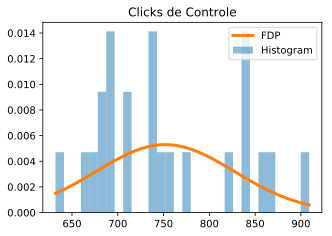

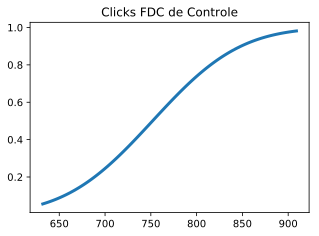

In [4]:
import numpy as np
import scipy.stats
#import matplotlib.pyplot as plt
%config InlineBackend.figure_formats=['svg']

# Clicks de Controle
Clicks = control_data2['Clicks']
plt.figure(figsize=(5,3.5))
plt.hist(Clicks, bins=30, normed=True, alpha=0.5, label='Histogram')
plt.legend('histogram')
mu, sigma = scipy.stats.norm.fit(Clicks)
x = np.linspace(Clicks.min(), Clicks.max(), 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma), lw=3, label='FDP');
plt.legend()
plt.title('Clicks de Controle')

plt.figure(figsize=(5,3.5))
plt.plot(x, scipy.stats.norm.cdf(x, mu, sigma), lw=3);
plt.title('Clicks FDC de Controle')

Nestes gráficos de FDP e FDC (Controle e Experimento) podemos verificar o comportamento normal dos dados da variável _Clicks_.

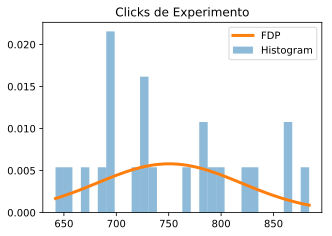

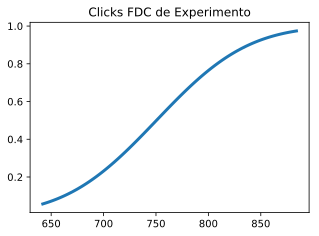

In [5]:
# Clicks de Experimento
Clicks = experiment_data2['Clicks']
plt.figure(figsize=(5,3.5))
plt.hist(Clicks, bins=30, normed=True, alpha=0.5, label='Histogram')
plt.legend('histogram')
mu, sigma = scipy.stats.norm.fit(Clicks)
x = np.linspace(Clicks.min(), Clicks.max(), 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma), lw=3, label='FDP');
plt.legend()
plt.title('Clicks de Experimento')

plt.figure(figsize=(5,3.5))
plt.plot(x, scipy.stats.norm.cdf(x, mu, sigma), lw=3);
plt.title('Clicks FDC de Experimento')

Nos plots abaixo, gerados pela ferramenta Minitab 16, podemos ver dois gráficos de linha que são comumente usados para exibir mudanças ao longo do tempo. Um comparativo entre a evolução do período de matrícula e do período de pagamento entre as planilhas de Controle e Experimento. O gráfico de linhas ajuda a determinar a relação entre os dois conjuntos de valores.

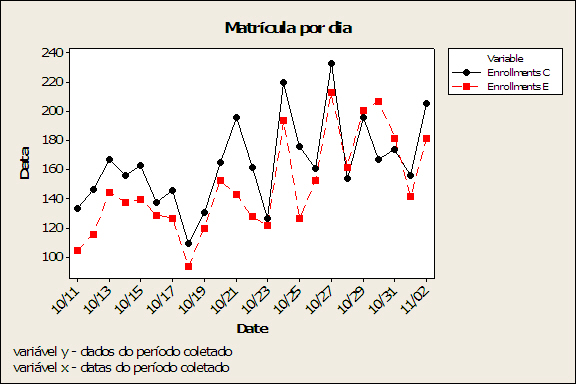

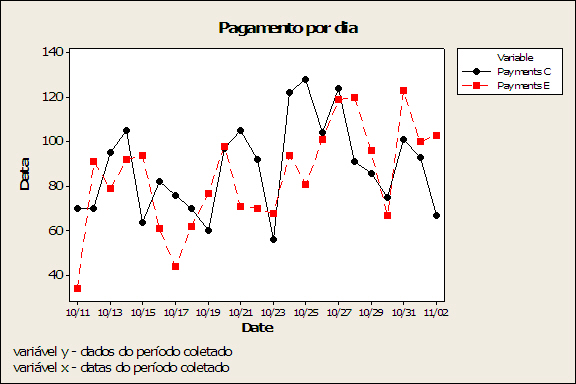

In [6]:
from IPython.display import Image, display

x = Image(filename='Enrollments.jpg') 
y = Image(filename='Payments.jpg') 
display(x, y)

Foi utilizado no primeiro gráfico as colunas _Enrollments_ de controle e experimento (Enrollments C e E) no eixo vertical y. Embora o período de medição seja curto, é possível verificar uma leve melhora da variável _Enrollments_ de experimento com relação à mesma variável de controle. Porém, no gráfico seguinte, a evolução da variável _Payments_ de experimento é bem superior em comparação com a mesma variável de controle.

# Sanity Checks

Seguindo o enunciado, comecei por verificar se as métricas invariantes são equivalentes entre os dois grupos.

In [12]:
print "Grupo de Controle:"
print "Clicks =", control_data['Clicks'].sum(), "   ", \
      "Pageviews =", control_data['Pageviews'].sum()
print 
print "Grupo de Experimento:"
print "Clicks =", experiment_data['Clicks'].sum(), "   ", \
      "Pageviews =", experiment_data['Pageviews'].sum()

Grupo de Controle:
Clicks = 28378.0     Pageviews = 345543.0

Grupo de Experimento:
Clicks = 28325     Pageviews = 344660


E os seguintes cálculos foram feitos para validar o _sanity checks_ com um intervalo de confiança de 95%. Portanto, a verificação de sanidade passará se os dados observados caírem no intervalo de confiança.

In [13]:
#import math
# Cálculos para verificar as métricas invariantes
p = 0.5
print "Number of cookies:"
SE_cookies = math.sqrt(p * p / (345543 + 344660))
print "Standard error SE =", SE_cookies
ME_cookies = SE_cookies * 1.96
print "Margin of error ME =", ME_cookies
(LB_cookies, UB_cookies) = (p - ME_cookies, p + ME_cookies)
print "Confidential interval CI =", (LB_cookies, UB_cookies)
print u'p\u0302', "=", 345543.0 / (345543 + 344660), u'\u2208', (LB_cookies, UB_cookies), u'\u2713'
print
print 'Number of clicks on “Start free trial":'
SE_clicks = math.sqrt(0.5 * 0.5 / (28378 + 28325))
print "Standard error SE =", SE_clicks
ME_clicks = SE_clicks * 1.96
print "Margin of error ME =", ME_clicks
(LB_clicks, UB_clicks) = (p - ME_clicks, p + ME_clicks)
print "Confidential interval CI =", (LB_clicks, UB_clicks)
print u'p\u0302', "=", 28378.0 / (28378 + 28325), u'\u2208', (LB_clicks, UB_clicks), u'\u2713'
print
print 'Click-through-probability on "Start free trial":'
p_pool = 1.0 * (28378 + 28325) / (345543 + 344660)
print "Pooled probability p_pool =", p_pool
SE_pool = math.sqrt(p_pool * (1 - p_pool) * (1.0 / 345543 + 1.0 / 344660))
print "Standard error SE =", SE_pool
ME_pool = SE_pool * 1.96
print "Margin of error ME =", ME_pool
d_hat = 28325.0 / 344660 - 28378.0 / 345543
print "Difference", u'd\u0302', "=", d_hat
(LB_pool, UB_pool) = (0 - ME_pool, 0 + ME_pool)
print "Confidential interval CI =", (LB_pool, UB_pool)
print u'd\u0302', u'\u2208', (LB_pool, UB_pool), u'\u2713'

Number of cookies:
Standard error SE = 0.000601840740294
Margin of error ME = 0.00117960785098
Confidential interval CI = (0.49882039214902313, 0.5011796078509769)
p̂ = 0.500639666881 ∈ (0.49882039214902313, 0.5011796078509769) ✓

Number of clicks on “Start free trial":
Standard error SE = 0.0020997470797
Margin of error ME = 0.00411550427621
Confidential interval CI = (0.49588449572378945, 0.5041155042762105)
p̂ = 0.500467347407 ∈ (0.49588449572378945, 0.5041155042762105) ✓

Click-through-probability on "Start free trial":
Pooled probability p_pool = 0.0821540908979
Standard error SE = 0.000661060815639
Margin of error ME = 0.00129567919865
Difference d̂ = 5.66270915869e-05
Confidential interval CI = (-0.0012956791986518956, 0.0012956791986518956)
d̂ ∈ (-0.0012956791986518956, 0.0012956791986518956) ✓


Todas as métricas invariantes resistiram ao teste com sucesso, como podemos ver nos resultados acima e na tabela abaixo.

| Métricas Invariantes | Lower bound | Upper bound | Observed | Pass/Fail |
| :-----: | :-----: | :-----: | :-----: | :-----: | :-----: | :-----: | :-----: |
| Number of Cookies | 0.4988 | 0.5012 | 0.5006 | pass |
| Number of Clicks | 0.4959 | 0.5041 | 0.5005 | pass | 
| Click-through-probability | - 0.0013 | 0.0013 | 0.0001 | pass | 

# Análise dos Resultados

## Effect Size Test

Para realizar o teste do tamanho do efeito, segue-se como abaixo.

In [16]:
print "Grupo de Controle:"
print "Clicks =", control_data2['Clicks'].sum(), "   ", \
"Enrollments =", control_data2['Enrollments'].sum(), "   ", \
"Payments =", control_data2['Payments'].sum()
print
print "Grupo de Experimento:"
print "Clicks =", experiment_data2['Clicks'].sum(), "   ", \
"Enrollments =", experiment_data2['Enrollments'].sum(), "   ", \
"Payments =", experiment_data2['Payments'].sum()

Grupo de Controle:
Clicks = 18081.0     Enrollments = 3785.0     Payments = 2033.0

Grupo de Experimento:
Clicks = 18049     Enrollments = 3423.0     Payments = 1945.0


Para esta parte, verificaremos se as métricas de avaliação são estatisticamente e praticamente significativas. Para tal, será estimado um intervalo de confiança de 95% em torno da diferença entre os grupos Experimento e Controle.

Os resultados obtidos são os seguintes:

In [19]:
# Cálculos para verificar as métricas de avaliação
print "Gross conversion"
p_pool = 1.0 * (3785.0 + 3423.0) / (17293 + 17260)
print "Pooled probability p_pool =", p_pool
SE_pool = math.sqrt(p_pool * (1 - p_pool) * (1.0 / 17293 + 1.0 / 17260))
print "Standard error SE =", SE_pool
ME_pool = SE_pool * 1.96
print "Margin of error ME =", ME_pool
d = 3423.0 / 17260 - 3785.0 / 17293
print "Difference d", "=", d
(LB_pool, UB_pool) = (d - ME_pool, d + ME_pool)
print "Confidence interval CI =", (LB_pool, UB_pool)
print (-0.01, 0, 0.01), u'\u2209', (LB_pool, UB_pool)
print "Estatísticamente significante", u'\u2713', "  Praticamente significante", u'\u2713'
print
print "Net conversion"
p_pool = 1.0 * (2033.0 + 1945.0) / (17293 + 17260)
print "Pooled probability p_pool =", p_pool
SE_pool = math.sqrt(p_pool * (1 - p_pool) * (1.0 / 17293 + 1.0 / 17260))
print "Standard error SE =", SE_pool
ME_pool = SE_pool * 1.96
print "Margin of error ME =", ME_pool
d = 1945.0 / 17260 - 2033.0 / 17293
print "Difference d =", d
(LB_pool, UB_pool) = (d - ME_pool, d + ME_pool)
print "Confidence interval CI =", (LB_pool, UB_pool)
print 0, u'\u2208', (LB_pool, UB_pool),  ";  dmin = -0.0075", u'\u2208', (LB_pool, UB_pool)
print "Estatísticamente significante", u'\u2718', "  Praticamente significante", u'\u2718'

Gross conversion
Pooled probability p_pool = 0.208607067404
Standard error SE = 0.00437167538523
Margin of error ME = 0.00856848375504
Difference d = -0.0205548745804
Confidence interval CI = (-0.0291233583354044, -0.01198639082531873)
(-0.01, 0, 0.01) ∉ (-0.0291233583354044, -0.01198639082531873)
Estatísticamente significante ✓   Praticamente significante ✓

Net conversion
Pooled probability p_pool = 0.115127485312
Standard error SE = 0.00343413351293
Margin of error ME = 0.00673090168535
Difference d = -0.00487372267454
Confidence interval CI = (-0.011604624359891718, 0.001857179010803383)
0 ∈ (-0.011604624359891718, 0.001857179010803383) ;  dmin = -0.0075 ∈ (-0.011604624359891718, 0.001857179010803383)
Estatísticamente significante ✘   Praticamente significante ✘


Para as métricas de avaliação (com excessão de _Retention_) temos os resultados:

| Métricas de avaliação | d min | Difference d (observed) | CI lower bound | CI upper bound | Result | 
| :-----: | :-----: | :-----: | :-----: | :-----: | :-----: | :-----: | :-----: |
| Gross conversion | 0.01 | - 0.0205 | - 0.0291 | - 0.0120 | estatísticamente e praticamente significativa |
| Net conversion | 0.0075 | - 0.0048 | - 0.0116 | 0.0018 | estatísticamente e praticamente não significativa | 

## Sign Test

Nesta parte de cálculos iremos abordar o teste Binomial e o teste de Sinal (Sign and Binomial tests). Resumidamente, o teste binomial é usado em experimentos para verificar dois possíveis resultados, sendo que, para cada tipo de resultado (tradicionalmente chamados de "sucesso" e "falha") procura responder se a verdadeira probabilidade de "sucesso" é o que sua teoria prevê. Já o teste de sinal é um caso especial do teste binomial, onde sua teoria é que os dois resultados possuem probabilidades iguais (QuickCalcs).

O procedimento inicial é saber quais são os possíveis resultados de "sucesso" das métricas.

In [24]:
# Cálculo de probabilidade de "sucesso"
Gross_conversion_success = experiment_data2['Enrollments']/experiment_data2['Clicks'] \
>control_data2['Enrollments']/control_data2['Clicks']
print "Gross conversion: sucesso =", Gross_conversion_success.sum(), "  total =", Gross_conversion_success.size
Net_conversion_success = experiment_data2['Payments']/experiment_data2['Clicks'] \
>control_data2['Payments']/control_data2['Clicks']
print "Net conversion: sucesso =", Net_conversion_success.sum(), "  total =", Net_conversion_success.size

Gross conversion: sucesso = 4   total = 23
Net conversion: sucesso = 10   total = 23


Os testes foram realizados para as métricas de avaliação, _Gross_ e _Net conversion_, com auxilio da ferramenta on-line _QuickCalcs_, do portal graphpad.com.

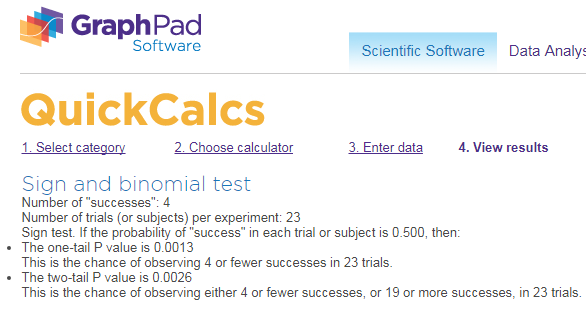

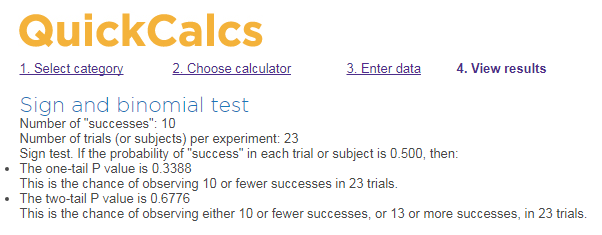

In [20]:
x = Image(filename='Gross_conversion.png') 
y = Image(filename='Net_conversion.png') 
display(x, y)

A regra neste caso para saber se é estatisticamente significativo é verificar se o p-valor é menor do que o nível de significância (alpha = 0.5). Sabendo isso, podemos estabelecer que a única métrica estatisticamente significativa é _Gross conversion_.

| Métricas | alpha | 2 tailed p-value | Statistically Significant | 
| :-----: | :-----: | :-----: | :-----: | 
| Gross conversion | 0.5 | 0.0026 | yes |
| Net conversion | 0.5 | 0.6776 | no |

## Resumo

Assim como já mencionado anteriormente no tópico Amostras vs Power, a correlação de Bonferroni não foi utilizada. A correção de Bonferroni é um procedimento que funciona bem em múltiplas comparações não relacionadas, todavia, as métricas de avaliação utilizadas neste projeto são dependentes e positivamente correlacionadas. Em algumas situações, o teste de Bonferroni se mostra bastante "conservativo" (fraco), isto é, a taxa de erro da família de testes (FWER) é muito menor do que o nível de significância (alpha) estabelecido (Portal Action). Outro ponto importante a ressaltar é que os objetivos das duas métricas precisam ser atingidos para que o experimento seja lançado. Essas características poderiam ter levado a problemas futuros no projeto.

# Recomendação

O experimento mostra que o pop-up reduz o número total de checkouts concluídos. No entanto, as análises também demonstram ter um efeito negativo sobre o número de alunos que continuam após o teste gratuito de 14 dias. Baseado na expectativa sobre o experimento, a recomendação é que não sejam colocadas as modificações em produção. Diante dos seguintes fatos:

* **Gross Conversion**

Esta métrica diminuiu conforme o esperado, provando sua significância estatística bem como sua significância prática. A métrica se mostrou negativa e isso é esperado, já que a maior parte dos alunos pode se sentir desencorajado a prosseguir com a inscrição no curso pela notificação de tempo de dedicação sugerida. A redução na quantidade de alunos que de fato se inscrevem pode permitir que os mentores da Udacity busquem meios para melhorar a capacidade de suporte aos alunos mais engajados.

* **Net Conversion**

Esta métrica não apresentou significância estatística e nem mesmo prática, não há evidências para afirmar que o experimento possua um efeito positivo na receita da Udacity. A métrica possui um intervalo de confiança que contempla o limite negativo de significância prática, é possível que ocorra uma redução na receita da empresa. Seria interessante realizar o experimento com um poder estatístico maior de forma a reduzir a taxa de falsos negativos.

* **Retention**

Por não termos dados suficientes para tirar conclusões sobre esta métrica, não podemos avaliar corretamente a diferença entre os grupos Controle e Experimento. Consequentemente, não há como saber se os usuários inscritos ficariam decepcionados com o processo de aprendizagem.

# Follow-Up de um Experimento

Com base nas recomendações, minha sugestão seria semelhante ao experimento já realizado, mas com alguns ajustes, como por exemplo quanto a duração do experimento. Poderia ser levado mais a frente, haviam poucos dados, talvez 2 meses de acompanhamento seria mais interessante. 

Uma preocupação natural neste período seria com relação ao declínio nas receitas, no entanto, com base nos dados que a Udacity já teria com antigos alunos, poderíamos determinar até que ponto seria interessante continuarmos com o experimento.

Outra sugestão seria projetar um experimento para ver se o motivo da alta taxa de desistência é resultado do compromisso com o tempo, e não de outras coisas, como a forma que os conteúdos são abordados nos vídeos ou como os modulos são organizados, etc. Isso poderia ser testado com diferentes arranjos do conteúdo introdutório durante os primeiros 14 dias, para ver se a mudança na taxa de abandono é um resultado referente ao conteúdo do curso ou se tem relação com os requisitos de tempo. Uma ideia a ser discutida seria transformar esses 14 dias em um micro curso, com a intenção do aluno ter uma noção geral do que será abordado, seja em conteúdo quanto em ferramenta.

Detalhes do experimento:

* **Procedimento:** Após a inscrição, os alunos seriam distribuídos aleatoriamente em um grupo de controle e outro de experimento, no qual os participantes no grupo de controle veriam o conteúdo sem modificação e os participantes do experimento veriam um arranjo diferente do curso apresentado.


* **Hipótese nula:** o novo arranjo do curso não alterará o número de estudantes matriculados além do período de avaliação gratuito de 14 dias, por uma quantidade significativa.


* **Unidade de desvio:** a unidade de desvio seria o id de usuário, uma vez que a mudança ocorre após o aluno criar uma conta e se inscrever em um curso, podendo-se assim rastrear toda a dinâmica desse aluno no curso.


* **Métrica invariante:** a métrica invariante seria o número do id de usuário, uma vez que uma distribuição igual entre experimento e controle seria esperada como propriedade do procedimento.


* **Métrica de avaliação:** a métrica de avaliação seria _Retention_. Um aumento estatisticamente e praticamente significativo na Retenção indicaria que a mudança foi bem sucedida.

# Referências bibliográficas

https://olgabelitskaya.github.io/P7_Design_an_A_B_Test_Overview.html

https://www.graphpad.com/quickcalcs/binomial1/

http://www.evanmiller.org/ab-testing/
    
http://www.portalaction.com.br/anova/33-teste-de-bonferroni
    
http://rpsychologist.com/d3/NHST/
    
https://effectsizefaq.com/2010/05/31/what-is-statistical-power/
    
https://github.com/AllenDowney/CompStats/blob/master/effect_size_soln.ipynb
    
https://cocalc.com/share/b0246d5b72268b26cefd70fd8bd7ff7bf955f908/atms391geodata/Week%207/Homework%207%20(answer%20key).ipynb?viewer=share
    
https://github.com/normonics/Intro-to-Data-Science-in-Python/blob/master/003b_Intro%20to%20scipy.stats.ipynb
    
https://support.minitab.com/pt-br/minitab/18/help-and-how-to/probability-distributions-and-random-data/supporting-topics/basics/using-the-cumulative-distribution-function-cdf/

http://www.betterevaluation.org/en/evaluation-options/LineGraph
    
https://github.com/netoferraz/udacity/tree/master/nanodegree/data_analyst/07_projetar_um_teste_AB
    
https://github.com/Gomit/AB-Testing_Udacity_Free_Trial_Screener/blob/master/AB-Testing.ipynb
    
https://github.com/vsvasconcelos/A-B-Test